In [1]:
tag_rankings = {'bill':0, 'title': 1, 'section':2, 'subsection':3, 'paragraph':4, 
                'subparagraph':5, 'clause':6, 'subclause':7, 'item':8, 'subitem':9, 'subsubitem':10}

In [8]:
ordered_tags = list(tag_rankings.keys())
ordered_tags

['bill',
 'title',
 'section',
 'subsection',
 'paragraph',
 'subparagraph',
 'clause',
 'subclause',
 'item',
 'subitem',
 'subsubitem']

In [6]:
tag_rankings = {key: value for (value, key) in enumerate(ordered_tags)}

In [7]:
tag_rankings

{'bill': 0,
 'title': 1,
 'section': 2,
 'subsection': 3,
 'paragraph': 4,
 'subparagraph': 5,
 'clause': 6,
 'subclause': 7,
 'item': 8,
 'subitem': 9,
 'subsubitem': 10}

In [ ]:
tag_rankings = {'bill':0, 'title': 1, 'section':2, 'subsection':3, 'paragraph':4, 
                'subparagraph':5, 'clause':6, 'subclause':7, 'item':8, 'subitem':9, 'subsubitem':10}

### [SOURCE](https://towardsdatascience.com/understanding-feature-engineering-part-3-traditional-methods-for-text-data-f6f7d70acd41)

In [ ]:

from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(similarity_matrix, 'ward')
pd.DataFrame(Z, columns=['Document\Cluster 1', 'Document\Cluster 2', 
                         'Distance', 'Cluster Size'], dtype='object')


from sklearn.feature_extraction.text import TfidfVectorizer

tv = TfidfVectorizer(min_df=0., max_df=1., use_idf=True)
tv_matrix = tv.fit_transform(norm_corpus)
tv_matrix = tv_matrix.toarray()

vocab = tv.get_feature_names()
pd.DataFrame(np.round(tv_matrix, 2), columns=vocab)

In [6]:
import os
import pandas as pd

In [7]:
PATH_TO_TRAINING = '../data/training_data/'
TRAINING_FILES = os.listdir(PATH_TO_TRAINING)
file_name = TRAINING_FILES[2]

In [8]:
file_name

'trainingdata_v1_GLOVEemb100_Education.csv'

In [9]:
training_data = pd.read_csv(PATH_TO_TRAINING + file_name)
del training_data['Unnamed: 0']

In [45]:
training_data.shape

(33333, 101)

In [ ]:
training_data.

In [32]:
from __future__ import print_function

import logging
import numpy as np
from optparse import OptionParser
import sys
from time import time
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import RidgeClassifier
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import BernoulliNB, ComplementNB, MultinomialNB, GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils.extmath import density
from sklearn import metrics


# Display progress logs on stdout
logging.basicConfig(level=logging.INFO,
                    format='%(asctime)s %(levelname)s %(message)s')


# parse commandline arguments
op = OptionParser()
op.add_option("--report",
              action="store_true", dest="print_report",
              help="Print a detailed classification report.")
op.add_option("--chi2_select",
              action="store", type="int", dest="select_chi2",
              help="Select some number of features using a chi-squared test")
op.add_option("--confusion_matrix",
              action="store_true", dest="print_cm",
              help="Print the confusion matrix.")
op.add_option("--top10",
              action="store_true", dest="print_top10",
              help="Print ten most discriminative terms per class"
                   " for every classifier.")
op.add_option("--all_categories",
              action="store_true", dest="all_categories",
              help="Whether to use all categories or not.")
op.add_option("--use_hashing",
              action="store_true",
              help="Use a hashing vectorizer.")
op.add_option("--n_features",
              action="store", type=int, default=2 ** 16,
              help="n_features when using the hashing vectorizer.")
op.add_option("--filtered",
              action="store_true",
              help="Remove newsgroup information that is easily overfit: "
                   "headers, signatures, and quoting.")


<Option at 0x11e8cc0b8: --filtered>

In [11]:

def is_interactive():
    return not hasattr(sys.modules['__main__'], '__file__')


In [12]:
# work-around for Jupyter notebook and IPython console
argv = [] if is_interactive() else sys.argv[1:]
(opts, args) = op.parse_args(argv)
if len(args) > 0:
    op.error("this script takes no arguments.")
    sys.exit(1)

print(__doc__)
op.print_help()
print()


Automatically created module for IPython interactive environment
Usage: ipykernel_launcher.py [options]

Options:
  -h, --help            show this help message and exit
  --report              Print a detailed classification report.
  --chi2_select=SELECT_CHI2
                        Select some number of features using a chi-squared
                        test
  --confusion_matrix    Print the confusion matrix.
  --top10               Print ten most discriminative terms per class for
                        every classifier.
  --all_categories      Whether to use all categories or not.
  --use_hashing         Use a hashing vectorizer.
  --n_features=N_FEATURES
                        n_features when using the hashing vectorizer.
  --filtered            Remove newsgroup information that is easily overfit:
                        headers, signatures, and quoting.



In [24]:
categories = ['not_summary', 'in_summary']#, 'is_summary']
target_names = categories

In [16]:
print(categories if categories else "all")

['not_summary', 'in_summary']


In [17]:
training_data.head()

,embed_000,embed_001,embed_002,embed_003,embed_004,embed_005,embed_006,embed_007,embed_008,embed_009,...,embed_091,embed_092,embed_093,embed_094,embed_095,embed_096,embed_097,embed_098,embed_099,in_summary
0,-0.056422,0.022105,0.268965,-0.172620,0.155507,-0.054346,-0.233235,0.229572,-0.335401,0.084562,...,-0.117333,-0.206922,0.261570,-0.330002,-0.079763,-0.031500,-0.191006,0.519074,-0.108229,1
1,0.058652,-0.117069,0.460318,0.040631,0.370035,0.216636,-0.342123,0.053123,-0.647005,0.246054,...,-0.191864,-0.173184,0.678500,-0.333590,-0.077078,-0.273590,-0.433252,0.637059,-0.069550,0
2,-0.023605,0.197405,0.155603,0.023352,0.058235,0.056801,-0.164208,0.169467,-0.421830,0.204527,...,-0.132863,-0.150759,0.347252,-0.492464,0.248988,-0.213403,-0.430866,0.720138,0.159700,1
3,-0.022930,0.017849,0.287668,-0.084799,0.055446,0.166762,-0.121587,0.391760,-0.277280,0.053404,...,-0.221300,-0.289683,0.370285,-0.378162,0.040656,-0.133651,-0.321041,0.416759,-0.088398,0
4,0.157584,0.207188,0.077027,0.016410,0.033980,0.275900,-0.326005,0.293169,-0.344101,0.304878,...,-0.149532,-0.144093,0.313850,-0.448105,0.124416,-0.253026,-0.427831,0.575843,0.057013,1


In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X = training_data.drop(columns=['in_summary'])
y = training_data[['in_summary']]

In [20]:
(X_train,
 X_test,
 y_train,
 y_test) = train_test_split(X, y, test_size=0.25, random_state=33)

In [21]:
def size_mb(docs):
    return sum(len(s.encode('utf-8')) for s in docs) / 1e6

In [23]:
data_train_size_mb = size_mb(X_train)
data_test_size_mb = size_mb(X_test)

In [27]:
print("%d documents - %0.3fMB (training set)" % (
    len(X_train), data_train_size_mb))
print("%d documents - %0.3fMB (test set)" % (
    len(X_test), data_test_size_mb))
print("%d categories" % len(target_names))
print()

24999 documents - 0.001MB (training set)
8334 documents - 0.001MB (test set)
2 categories



### ONLY NECESSARY FOR WORD INPUTS
```python
print("Extracting features from the training data using a sparse vectorizer")
t0 = time()
if opts.use_hashing:
    vectorizer = HashingVectorizer(stop_words='english', alternate_sign=False,
                                   n_features=opts.n_features)
    X_train = vectorizer.transform(data_train.data)
else:
    vectorizer = TfidfVectorizer(sublinear_tf=True, max_df=0.5,
                                 stop_words='english')
    X_train = vectorizer.fit_transform(data_train.data)
duration = time() - t0
print("done in %fs at %0.3fMB/s" % (duration, data_train_size_mb / duration))
print("n_samples: %d, n_features: %d" % X_train.shape)
print()

print("Extracting features from the test data using the same vectorizer")
t0 = time()
X_test = vectorizer.transform(data_test.data)
duration = time() - t0
print("done in %fs at %0.3fMB/s" % (duration, data_test_size_mb / duration))
print("n_samples: %d, n_features: %d" % X_test.shape)
print()

# mapping from integer feature name to original token string
if opts.use_hashing:
    feature_names = None
else:
    feature_names = vectorizer.get_feature_names()

if opts.select_chi2:
    print("Extracting %d best features by a chi-squared test" %
          opts.select_chi2)
    t0 = time()
    ch2 = SelectKBest(chi2, k=opts.select_chi2)
    X_train = ch2.fit_transform(X_train, y_train)
    X_test = ch2.transform(X_test)
    if feature_names:
        # keep selected feature names
        feature_names = [feature_names[i] for i
                         in ch2.get_support(indices=True)]
    print("done in %fs" % (time() - t0))
    print()

if feature_names:
    feature_names = np.asarray(feature_names)


def trim(s):
    """Trim string to fit on terminal (assuming 80-column display)"""
    return s if len(s) <= 80 else s[:77] + "..."

```

In [28]:
# #############################################################################
# Benchmark classifiers
def benchmark(clf):
    print('_' * 80)
    print("Training: ")
    print(clf)
    t0 = time()
    clf.fit(X_train, y_train)
    train_time = time() - t0
    print("train time: %0.3fs" % train_time)

    t0 = time()
    pred = clf.predict(X_test)
    test_time = time() - t0
    print("test time:  %0.3fs" % test_time)

    score = metrics.accuracy_score(y_test, pred)
    print("accuracy:   %0.3f" % score)

    if hasattr(clf, 'coef_'):
        print("dimensionality: %d" % clf.coef_.shape[1])
        print("density: %f" % density(clf.coef_))

        if opts.print_top10 and feature_names is not None:
            print("top 10 keywords per class:")
            for i, label in enumerate(target_names):
                top10 = np.argsort(clf.coef_[i])[-10:]
                print(trim("%s: %s" % (label, " ".join(feature_names[top10]))))
        print()

    if opts.print_report:
        print("classification report:")
        print(metrics.classification_report(y_test, pred,
                                            target_names=target_names))

    if opts.print_cm:
        print("confusion matrix:")
        print(metrics.confusion_matrix(y_test, pred))

    print()
    clf_descr = str(clf).split('(')[0]
    return clf_descr, score, train_time, test_time

In [42]:
result = benchmark(LinearSVC(penalty=penalty, dual=False,
                                       tol=1e-3))

________________________________________________________________________________
Training: 
LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l1', random_state=None, tol=0.001,
     verbose=0)


/Users/melissaferrari/anaconda3/envs/congress_py36/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


train time: 10.586s
test time:  0.002s
accuracy:   0.883
dimensionality: 100
density: 0.870000




/Users/melissaferrari/anaconda3/envs/congress_py36/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [44]:
result.

('LinearSVC', 0.8833693304535637, 10.585973978042603, 0.0022149085998535156)

In [29]:
results = []
for clf, name in (
        (RidgeClassifier(tol=1e-2, solver="sag"), "Ridge Classifier"),
        (Perceptron(max_iter=50, tol=1e-3), "Perceptron"),
        (PassiveAggressiveClassifier(max_iter=50, tol=1e-3),
         "Passive-Aggressive"),
        (KNeighborsClassifier(n_neighbors=10), "kNN"),
        (RandomForestClassifier(n_estimators=100), "Random forest")):
    print('=' * 80)
    print(name)
    results.append(benchmark(clf))

for penalty in ["l2", "l1"]:
    print('=' * 80)
    print("%s penalty" % penalty.upper())
    # Train Liblinear model
    results.append(benchmark(LinearSVC(penalty=penalty, dual=False,
                                       tol=1e-3)))

    # Train SGD model
    results.append(benchmark(SGDClassifier(alpha=.0001, max_iter=50,
                                           penalty=penalty)))

# Train SGD with Elastic Net penalty
print('=' * 80)
print("Elastic-Net penalty")
results.append(benchmark(SGDClassifier(alpha=.0001, max_iter=50,
                                       penalty="elasticnet")))

# Train NearestCentroid without threshold
print('=' * 80)
print("NearestCentroid (aka Rocchio classifier)")
results.append(benchmark(NearestCentroid()))

print('=' * 80)
print("LinearSVC with L1-based feature selection")
# The smaller C, the stronger the regularization.
# The more regularization, the more sparsity.
results.append(benchmark(Pipeline([
  ('feature_selection', SelectFromModel(LinearSVC(penalty="l1", dual=False,
                                                  tol=1e-3))),
  ('classification', LinearSVC(penalty="l2"))])))



Ridge Classifier
________________________________________________________________________________
Training: 
RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
        max_iter=None, normalize=False, random_state=None, solver='sag',
        tol=0.01)


/Users/melissaferrari/anaconda3/envs/congress_py36/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:839: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


train time: 0.719s
test time:  0.004s
accuracy:   0.883
dimensionality: 100
density: 1.000000


Perceptron
________________________________________________________________________________
Training: 
Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
      fit_intercept=True, max_iter=50, n_iter=None, n_iter_no_change=5,
      n_jobs=None, penalty=None, random_state=0, shuffle=True, tol=0.001,
      validation_fraction=0.1, verbose=0, warm_start=False)
train time: 0.062s
test time:  0.002s
accuracy:   0.225
dimensionality: 100
density: 1.000000


Passive-Aggressive
________________________________________________________________________________
Training: 
PassiveAggressiveClassifier(C=1.0, average=False, class_weight=None,
              early_stopping=False, fit_intercept=True, loss='hinge',
              max_iter=50, n_iter=None, n_iter_no_change=5, n_jobs=None,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, ver

/Users/melissaferrari/anaconda3/envs/congress_py36/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/melissaferrari/anaconda3/envs/congress_py36/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/melissaferrari/anaconda3/envs/congress_py36/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


train time: 0.150s
test time:  61.412s
accuracy:   0.877

Random forest
________________________________________________________________________________
Training: 
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


/Users/melissaferrari/anaconda3/envs/congress_py36/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


train time: 22.846s
test time:  0.255s
accuracy:   0.921

L2 penalty
________________________________________________________________________________
Training: 
LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.001,
     verbose=0)


/Users/melissaferrari/anaconda3/envs/congress_py36/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


train time: 0.647s
test time:  0.007s
accuracy:   0.883
dimensionality: 100
density: 1.000000


________________________________________________________________________________
Training: 
SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=50,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)


/Users/melissaferrari/anaconda3/envs/congress_py36/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
/Users/melissaferrari/anaconda3/envs/congress_py36/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


train time: 0.421s
test time:  0.002s
accuracy:   0.883
dimensionality: 100
density: 1.000000


L1 penalty
________________________________________________________________________________
Training: 
LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l1', random_state=None, tol=0.001,
     verbose=0)


/Users/melissaferrari/anaconda3/envs/congress_py36/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/melissaferrari/anaconda3/envs/congress_py36/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/melissaferrari/anaconda3/envs/congress_py36/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
/User

train time: 9.831s
test time:  0.002s
accuracy:   0.883
dimensionality: 100
density: 0.820000


________________________________________________________________________________
Training: 
SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=50,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l1',
       power_t=0.5, random_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)
train time: 0.928s
test time:  0.002s
accuracy:   0.883
dimensionality: 100
density: 0.600000


Elastic-Net penalty
________________________________________________________________________________
Training: 
SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=5

/Users/melissaferrari/anaconda3/envs/congress_py36/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
/Users/melissaferrari/anaconda3/envs/congress_py36/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


train time: 1.042s
test time:  0.002s
accuracy:   0.883
dimensionality: 100
density: 0.750000


NearestCentroid (aka Rocchio classifier)
________________________________________________________________________________
Training: 
NearestCentroid(metric='euclidean', shrink_threshold=None)
train time: 0.021s
test time:  0.014s
accuracy:   0.397

Naive Bayes
________________________________________________________________________________
Training: 
MultinomialNB(alpha=0.01, class_prior=None, fit_prior=True)


/Users/melissaferrari/anaconda3/envs/congress_py36/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/melissaferrari/anaconda3/envs/congress_py36/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: Input X must be non-negative

In [30]:
results

[('RidgeClassifier',
  0.8833693304535637,
  0.7188811302185059,
  0.004220247268676758),
 ('Perceptron',
  0.22450203983681305,
  0.06226491928100586,
  0.0016849040985107422),
 ('PassiveAggressiveClassifier',
  0.8539716822654188,
  0.0849909782409668,
  0.0018069744110107422),
 ('KNeighborsClassifier',
  0.8774898008159348,
  0.14961504936218262,
  61.41171884536743),
 ('RandomForestClassifier',
  0.9208063354931606,
  22.846206188201904,
  0.2554140090942383),
 ('LinearSVC', 0.8833693304535637, 0.6468830108642578, 0.00700068473815918),
 ('SGDClassifier',
  0.8834893208543316,
  0.42073988914489746,
  0.002087831497192383),
 ('LinearSVC', 0.8833693304535637, 9.83080005645752, 0.002057790756225586),
 ('SGDClassifier',
  0.8834893208543316,
  0.9276154041290283,
  0.0021266937255859375),
 ('SGDClassifier',
  0.8834893208543316,
  1.0417311191558838,
  0.0019719600677490234),
 ('NearestCentroid',
  0.39656827453803695,
  0.020511150360107422,
  0.014255046844482422)]

In [35]:
# Train sparse Naive Bayes classifiers
print('=' * 80)
print("Naive Bayes")
results.append(benchmark(GaussianNB()))

Naive Bayes
________________________________________________________________________________
Training: 
GaussianNB(priors=None, var_smoothing=1e-09)
train time: 0.073s
test time:  0.021s
accuracy:   0.430



/Users/melissaferrari/anaconda3/envs/congress_py36/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LinearSVC with L1-based feature selection
________________________________________________________________________________
Training: 
Pipeline(memory=None,
     steps=[('feature_selection', SelectFromModel(estimator=LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l1', random_state=None, tol=0.001,
     verbose=0),
        max_features=None, no...ax_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))])


/Users/melissaferrari/anaconda3/envs/congress_py36/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/melissaferrari/anaconda3/envs/congress_py36/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/melissaferrari/anaconda3/envs/congress_py36/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


train time: 21.045s
test time:  0.003s
accuracy:   0.883



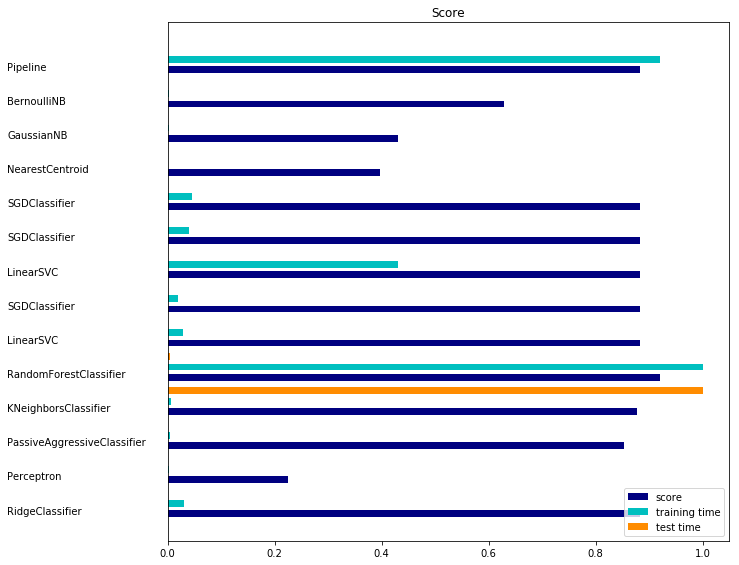

In [39]:
# make some plots

indices = np.arange(len(results))

results = [[x[i] for x in results] for i in range(4)]

clf_names, score, training_time, test_time = results
training_time = np.array(training_time) / np.max(training_time)
test_time = np.array(test_time) / np.max(test_time)

plt.figure(figsize=(12, 8))
plt.title("Score")
plt.barh(indices, score, .2, label="score", color='navy')
plt.barh(indices + .3, training_time, .2, label="training time",
         color='c')
plt.barh(indices + .6, test_time, .2, label="test time", color='darkorange')
plt.yticks(())
plt.legend(loc='best')
plt.subplots_adjust(left=.25)
plt.subplots_adjust(top=.95)
plt.subplots_adjust(bottom=.05)

for i, c in zip(indices, clf_names):
    plt.text(-.3, i, c)

plt.show()


TypeError: cannot perform reduce with flexible type